In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import params as prm
import pandas as pd
import numpy as np
import torch
import os

## Sans clampage

In [16]:
df_1f = pd.read_csv(os.path.join(prm.datasets_pp_path, f"DF_{prm.dataset_1er_tour}.csv"))
df_2f = pd.read_csv(os.path.join(prm.datasets_pp_path, f"DF_{prm.dataset_2nd_tour}.csv"))
print(df_1f.shape, df_2f.shape)

(61593, 23) (61593, 18)


In [17]:
sans_clamp = []
for file in os.listdir(prm.results_path):
    if file[-10:-2] == "original":
        sans_clamp.append(file)

In [22]:
for s_clamp in sans_clamp:
    path = os.path.join(prm.results_path, s_clamp)
    Matrice = np.load(os.path.join(path, os.listdir(path)[-3]))

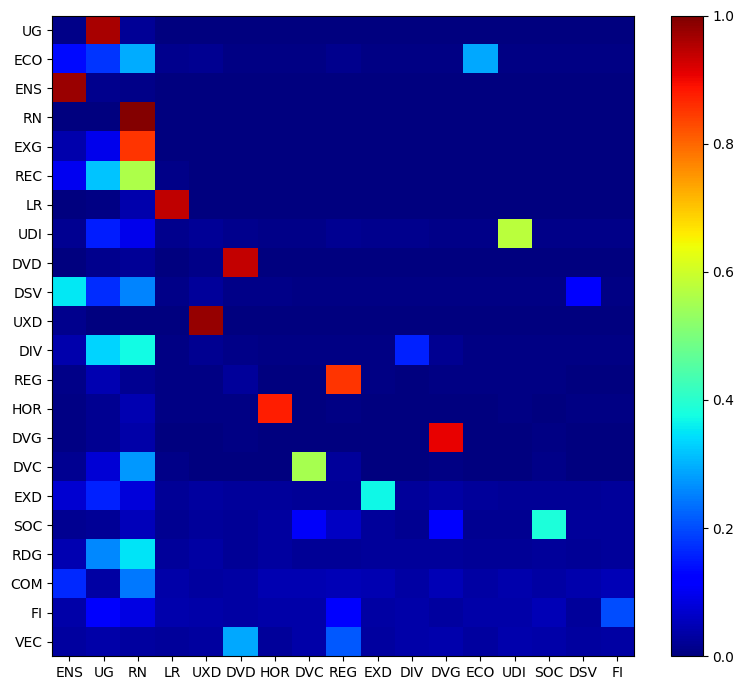

In [45]:
fig,ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(8,7)
)
g = ax.imshow(
    Matrice,
    aspect="auto",
    cmap="jet",
    vmin=0,
    vmax=1
)
fig.colorbar(
    g,
    ax=ax
)
ax.set_xticks(
    range(df_2f.keys()[:-1].shape[0]),
    df_2f.keys()[:-1]
)
ax.set_yticks(
    range(df_1f.keys()[:-1].shape[0]),
    df_1f.keys()[:-1]
)
plt.tight_layout()
plt.show()

In [122]:
T_df_1f = torch.Tensor(df_1f[df_1f.keys()[:-1]].to_numpy() / df_1f[df_1f.keys()[:-1]].to_numpy().sum(axis=1)[:,None])
T_Matrice = torch.Tensor(Matrice)
print(T_df_1f.shape, T_Matrice.shape)

torch.Size([61593, 22]) torch.Size([22, 17])


In [123]:
pred_T_df_2f = T_df_1f @ T_Matrice
print(pred_T_df_2f.shape)

torch.Size([61593, 17])


In [124]:
pred_winner = df_2f.keys()[np.argmax(pred_T_df_2f, axis=1).numpy()]
winner = df_2f.keys()[np.argmax(df_2f[df_2f.keys()[:-1]].to_numpy(), axis=1)]

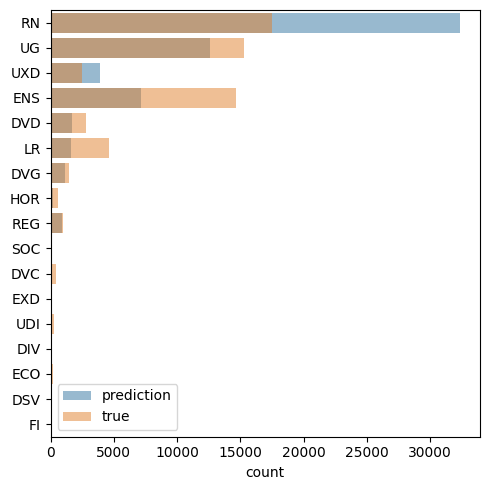

In [126]:
fig,ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(5,5),
    dpi=100
)
sns.countplot(
    pred_winner,
    alpha=0.5,
    label="prediction",
    ax=ax
)
sns.countplot(
    winner,
    alpha=0.5,
    label="true",
    ax=ax
)
ax.legend()
plt.tight_layout()
plt.show()

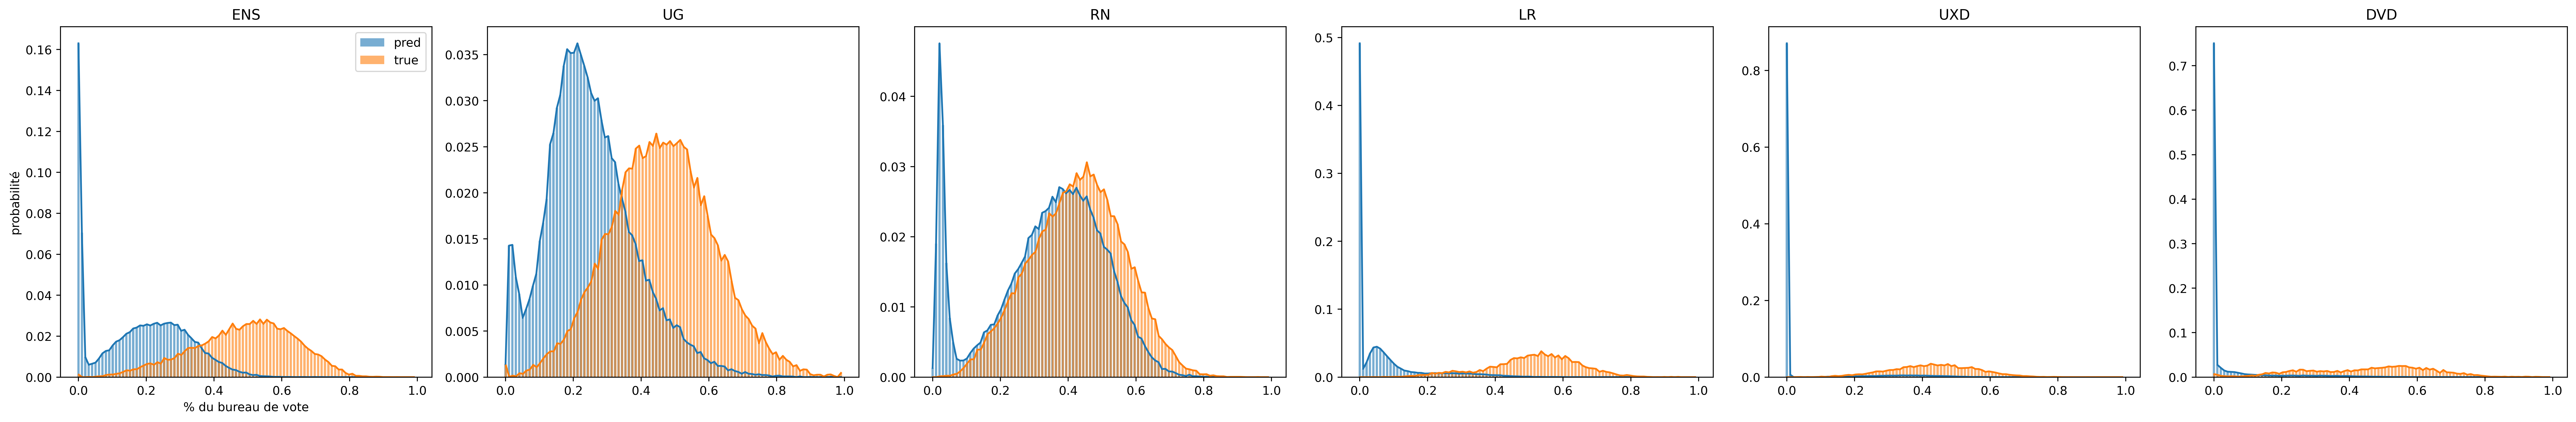

In [164]:
fig,ax = plt.subplots(
    nrows=1,
    ncols=6, #pred_T_df_2f.shape[-1],
    figsize=(30,5),
    dpi=500
)

for i in range(6):#range(pred_T_df_2f.shape[-1]):
    
    # Prédiction
    to_plot = pred_T_df_2f[:,i].numpy()
    values, bins = np.histogram(
        a=to_plot, bins=np.linspace(0, 1, 100)
    )
    ax[i].bar(
        x=bins[:-1],
        height=values/values.sum(),
        width=(bins[1]-bins[0])/1.5,
        alpha=0.6,
        label="pred"
    )
    ax[i].plot(
        bins[:-1],
        values/values.sum(),
        alpha=1
    )

    # Réalité
    values, bins = np.histogram(
        a=df_2f[df_2f.keys()[i]] / df_2f[df_2f.keys()[:-1]].sum(axis=1), bins=np.linspace(0.001, 1, 100)
    )
    ax[i].bar(
        x=bins[:-1],
        height=values/values.sum(),
        width=(bins[1]-bins[0])/1.5,
        alpha=0.6,
        label="true"
    )
    ax[i].plot(
        bins[:-1],
        values/values.sum(),
        alpha=1
    )
    ax[i].set_title(
        df_2f.keys()[i]
    )

ax[0].legend()
ax[0].set_ylabel("probabilité")
ax[0].set_xlabel("% du bureau de vote")

plt.tight_layout()
plt.savefig(
    os.path.join(prm.figures_path, "Distribution_bv_pred_true_2nd_tour.pdf"),
    dpi=500
)
plt.show()

## Focalisation sur certains face à face

In [2]:
focus = []
for file in os.listdir(prm.results_path):
    if file[:8] == "D1_focus":
        focus.append(file)

In [3]:
Matrice = []
for foc in focus:
    print(foc)
    path = os.path.join(prm.results_path, foc)
    Matrice.append(np.load(os.path.join(path, os.listdir(path)[-3])))

D1_focus_ENS_RN_6
D1_focus_LR_RN_9
D1_focus_UG_RN_8


In [6]:
df_1f = pd.read_csv(os.path.join(prm.datasets_pp_path, f"DF_{prm.dataset_1er_tour}.csv"))
df_2f = pd.read_csv(os.path.join(prm.datasets_pp_path, f"DF_{prm.dataset_2nd_tour}.csv"))

In [7]:
Nuances_1er_tour = df_1f.keys()[:-1]
Nuances_2nd_tour = df_2f.keys()[:-1]

In [9]:
import matplotlib.pyplot as plt

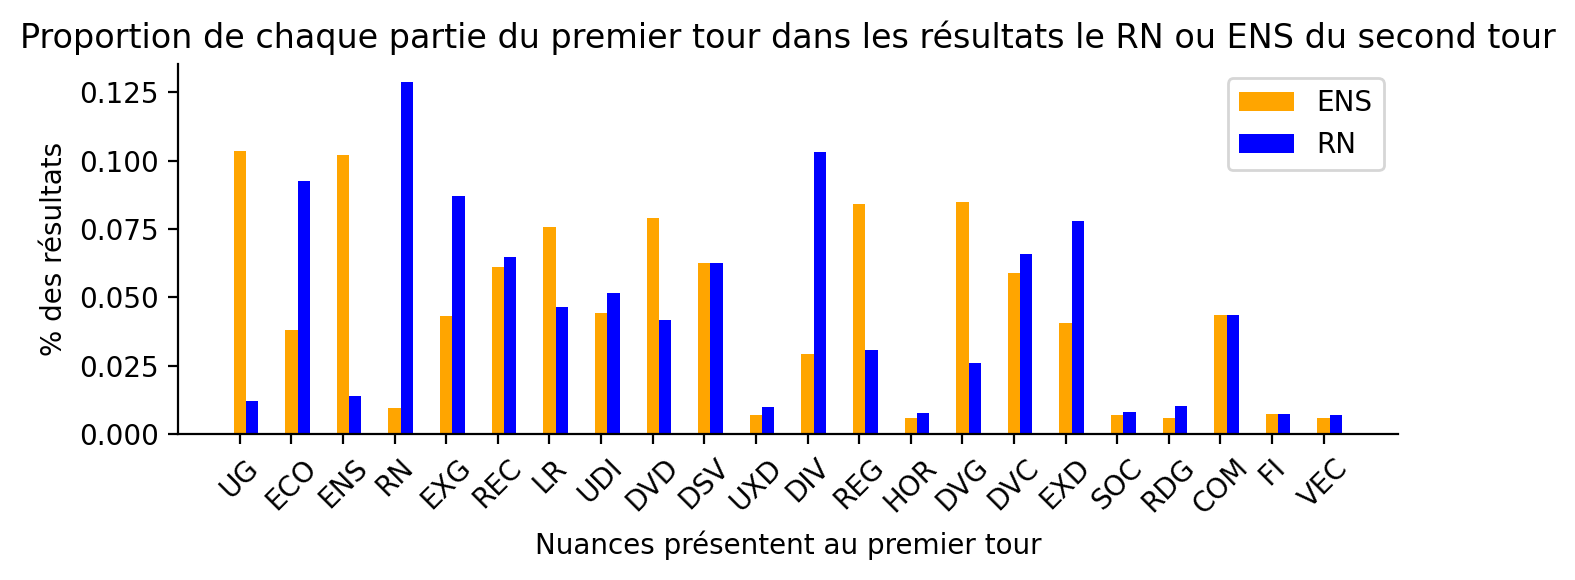

In [68]:
M_ENS_RN = np.concatenate([Matrice[0][:,:1], Matrice[0][:,2:3]], axis=1)
M_ENS_RN_norm = M_ENS_RN / M_ENS_RN.sum(axis=0)

fig,ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(7,3),
    dpi=200
)
ff = ["ENS","RN"]
colors = ["orange","blue"]
width = 0.25  # the width of the bars
offset = 0

for i in range(M_ENS_RN.shape[-1]):
    
    ax.bar(
        x = np.linspace(0, M_ENS_RN_norm.shape[0], M_ENS_RN_norm.shape[0]) + offset,
        height = M_ENS_RN_norm[:,i],
        width = width,
        color=colors[i],
        label = ff[i]
        )
    offset += width

ax.legend()
ax.set_xticks(
    np.linspace(0, M_ENS_RN_norm.shape[0], M_ENS_RN_norm.shape[0]),
    Nuances_1er_tour,
    rotation=45   
)
ax.spines[["top","right"]].set_visible(False)
ax.set_title("Proportion de chaque partie du premier tour dans les résultats le RN ou ENS du second tour")
ax.set_xlabel("Nuances présentent au premier tour")
ax.set_ylabel("% des résultats")
plt.tight_layout()
plt.savefig(os.path.join(prm.figures_path, "Focus_ENS_RN.pdf"), dpi=200)
plt.show()

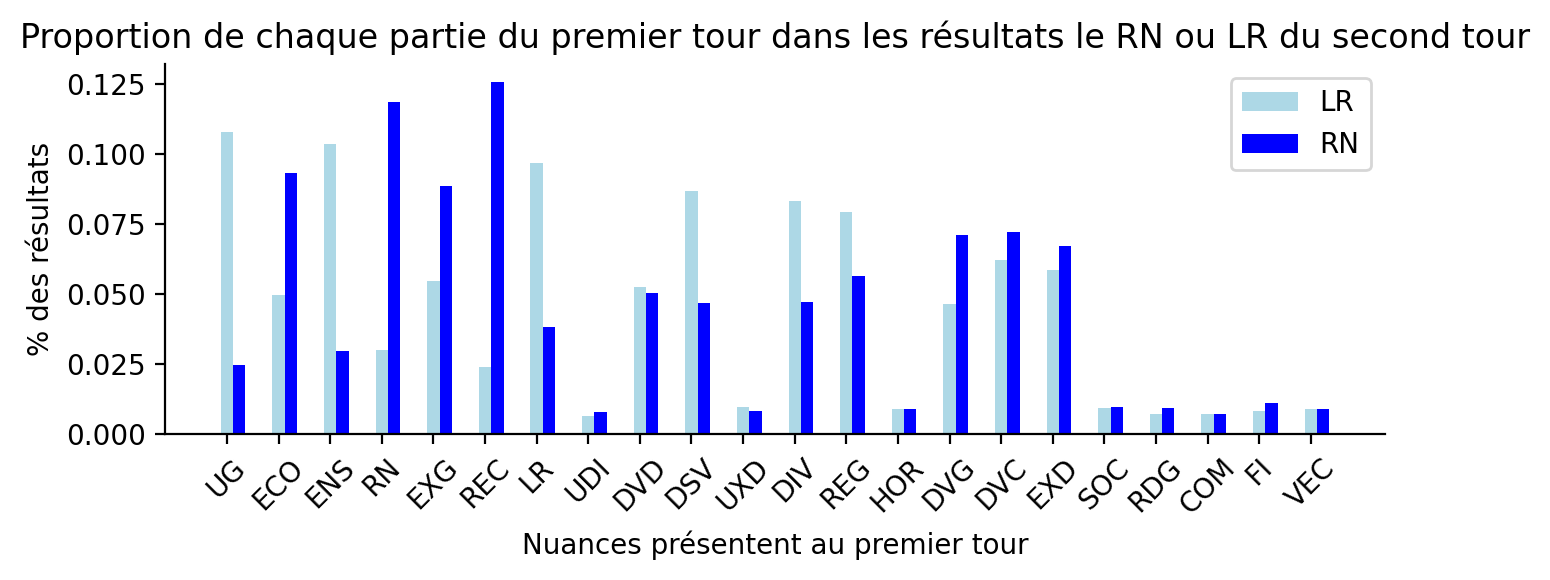

In [69]:
M_LR_RN = np.concatenate([Matrice[1][:,3:4], Matrice[1][:,2:3]], axis=1)
M_LR_RN_norm = M_LR_RN / M_LR_RN.sum(axis=0)

fig,ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(7,3),
    dpi=200
)
ff = ["LR","RN"]
colors = ["lightblue","blue"]
width = 0.25  # the width of the bars
offset = 0

for i in range(M_ENS_RN.shape[-1]):
    
    ax.bar(
        x = np.linspace(0, M_LR_RN.shape[0], M_LR_RN.shape[0]) + offset,
        height = M_LR_RN_norm[:,i],
        width = width,
        color=colors[i],
        label = ff[i]
        )
    offset += width

ax.legend()
ax.set_xticks(
    np.linspace(0, M_LR_RN.shape[0], M_LR_RN.shape[0]),
    Nuances_1er_tour,
    rotation=45
)
ax.spines[["top","right"]].set_visible(False)
ax.set_title("Proportion de chaque partie du premier tour dans les résultats le RN ou LR du second tour")
ax.set_xlabel("Nuances présentent au premier tour")
ax.set_ylabel("% des résultats")
plt.tight_layout()
plt.savefig(os.path.join(prm.figures_path, "Focus_LR_RN.pdf"), dpi=200)
plt.show()

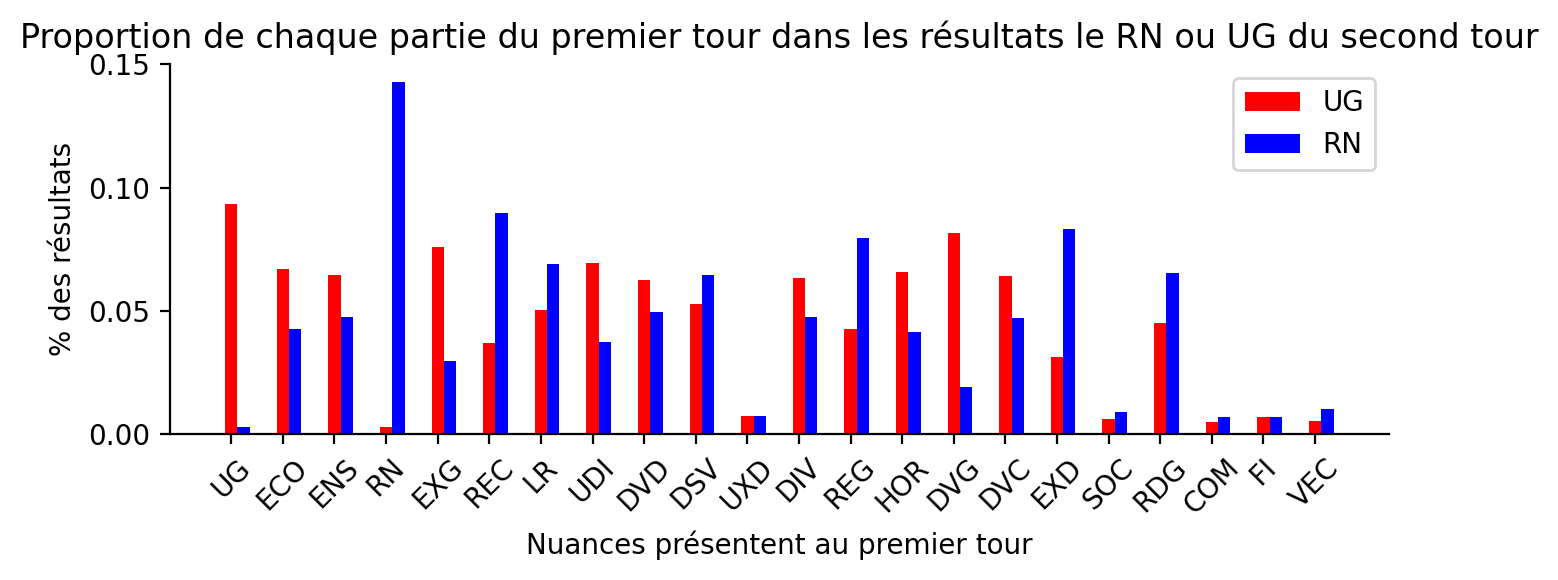

In [73]:
M_UG_RN = np.concatenate([Matrice[2][:,1:2], Matrice[2][:,2:3]], axis=1)
M_UG_RN_norm = M_UG_RN / M_UG_RN.sum(axis=0)

fig,ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(7,3),
    dpi=200
)
ff = ["UG","RN"]
colors = ["red","blue"]
width = 0.25  # the width of the bars
offset = 0

for i in range(M_UG_RN.shape[-1]):
    
    ax.bar(
        x = np.linspace(0, M_UG_RN.shape[0], M_UG_RN.shape[0]) + offset,
        height = M_UG_RN_norm[:,i],
        width = width,
        color=colors[i],
        label = ff[i]
        )
    offset += width

ax.legend()
ax.set_xticks(
    np.linspace(0, M_UG_RN.shape[0], M_UG_RN.shape[0]),
    Nuances_1er_tour,
    rotation=45  
)
ax.spines[["top","right"]].set_visible(False)
ax.set_title("Proportion de chaque partie du premier tour dans les résultats le RN ou UG du second tour")
ax.set_xlabel("Nuances présentent au premier tour")
ax.set_ylabel("% des résultats")
plt.tight_layout()
plt.savefig(os.path.join(prm.figures_path, "Focus_UG_RN.pdf"), dpi=200)
plt.show()